### Import libraries

In [33]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [34]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

### Exploring & Preprocessing Data
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [35]:
orig_dataset = pd.read_csv(dataset_path, na_values = "?", comment='\t', sep=" ", skipinitialspace=True, header=None)

In [36]:
orig_dataset.head()

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [37]:
orig_dataset.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [38]:
orig_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [39]:
orig_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


* Make a working copy of the dataframe
* Filling the missing values with median

In [40]:
dataset = orig_dataset.copy()

In [41]:
dataset.Horsepower.median()

93.5

In [42]:
dataset['Horsepower'] = dataset.Horsepower.fillna(93.5)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [44]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


* Origin is catagorical value, one hot encoding it

In [45]:
dataset.Origin.value_counts()

,count
Origin,
1,249
3,79
2,70


In [46]:
res = keras.utils.to_categorical(dataset.Origin)

In [47]:
res

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [48]:
res.shape

(398, 4)

In [49]:
res = res[:,1:]

In [50]:
res.sum(axis=0)

array([249.,  70.,  79.])

In [51]:
df = pd.DataFrame(res, columns=['Col1','Col2','Col3'])

In [52]:
df.head()

,Col1,Col2,Col3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [53]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [54]:
en_dataset = pd.concat([dataset, df], axis=1)

In [55]:
en_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Col1,Col2,Col3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,1.0,0.0,0.0


In [56]:
origin = en_dataset.pop('Origin')

In [57]:
en_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Col1,Col2,Col3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


* Inspect the data

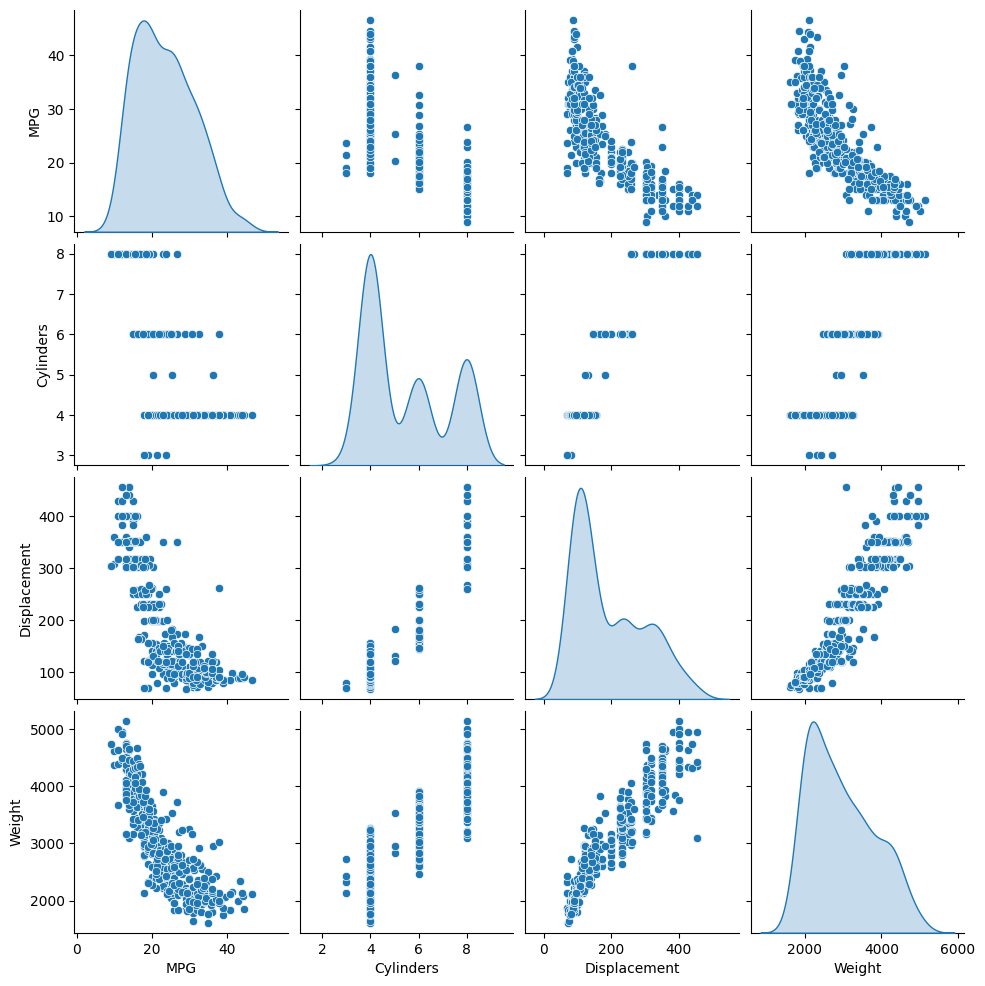

In [58]:
sns.pairplot(en_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [59]:
en_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Col1,Col2,Col3
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Splitting data for feature & target

In [60]:
label = en_dataset.pop('MPG')

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
en_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Col1,Col2,Col3
0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [63]:
label

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [64]:
trainX, testX, trainY, testY = train_test_split(en_dataset,label) # 75:25

In [65]:
trainX.shape,testX.shape

((298, 9), (100, 9))

### Normalize the data
* Encoding & Normalization has to happen to production data as well

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss = StandardScaler()

In [68]:
trainX_ss = ss.fit_transform(trainX)

In [69]:
testX_ss = ss.transform(testX)

### Build Model

In [70]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(en_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [71]:
model = build_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [74]:
EPOCHS = 1000
model = build_model()
history = model.fit(  trainX_ss, trainY, epochs=EPOCHS,validation_data = (testX_ss,testY) ,verbose=1)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 577.0145 - mae: 22.5764 - mse: 577.0145 - val_loss: 485.6200 - val_mae: 20.5891 - val_mse: 485.6200
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 552.5645 - mae: 21.9703 - mse: 552.5645 - val_loss: 425.7029 - val_mae: 18.9920 - val_mse: 425.7029
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 467.6282 - mae: 19.8790 - mse: 467.6282 - val_loss: 362.2740 - val_mae: 17.2149 - val_mse: 362.2740
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 379.6484 - mae: 17.5663 - mse: 379.6484 - val_loss: 297.6839 - val_mae: 15.2732 - val_mse: 297.6839
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 316.5973 - mae: 15.8307 - mse: 316.5973 - val_loss: 234.0968 - val_mae: 13.3067 - val_mse: 234.0968
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 251.9577 - mae: 14.0255 - mse: 251.9577 - val_loss: 176.8500 - val_mae: 11.3794 - val_mse: 176.8500
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms

### Visualizing Loss & its relation with epoch

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
hist

In [ ]:
hist.head()

In [ ]:
hist.tail()

In [ ]:
history.history.keys()

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)